# Utils

In [0]:
import numpy as np
import matplotlib.pyplot as plt

# Problem: regression

We will approximate of a point cloud following a linear function : $f(x) = 0.5 + 2x_1 - 0.3x_2 + 1.5x_3 = u^Tx, \quad \text{where} \; u =  \begin{pmatrix}0.5\\2\\-0.3\\1.5\end{pmatrix}, x =  \begin{pmatrix}x_1\\x_2\\x_3\\x_4\end{pmatrix} $.

We define $X$ as the design matrix, such as $X = 
\begin{pmatrix}
  1 & x^{(2)}_1 & \cdots & x^{(n)}_1 \\
  \vdots & \vdots & \ddots & \vdots \\
  1 & x^{(2)}_m & \cdots & x^{(n)}_m
\end{pmatrix} $
and $ y =
\begin{pmatrix}
  y_1 \\
  \vdots \\
  y_n \\
\end{pmatrix}
= f(X)$

We begin by defining the $f$ function

In [0]:
u = np.array([0.5, 2, -0.3, 1.5])
f = lambda x: np.dot(x, u)

The dataset contains $m$ training examples of size $n$, we define the inputs

In [0]:
m = 100
n = 4

X = np.zeros((m, n-1))
X[:, 0] = np.linspace(2, 8, m)
X[:, 1] = np.linspace(50, 900, m)
X[:, 2] = np.linspace(-5, -3, m)

We normalize our inputs: $ X = \frac{1}{\sigma_x} (X - \mu_x) $
where $ \mu_x = 
\begin{pmatrix}
  \mu_{x_1} \\
  \vdots \\
  \mu_{x_m} \\
\end{pmatrix}
$ is the mean of each feature, and 
$ \sigma_x = 
\begin{pmatrix}
  \sigma_{x_1} \\
  \vdots \\
  \sigma_{x_m} \\
\end{pmatrix}
$ is the standard deviation of each feature

In [0]:
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

We add the bias

In [0]:
X = np.concatenate([np.ones((m, 1)), X], axis=1)
assert X.shape == (m, n)

Target values are $y = f(X) + b()$, where $b$ is gaussian noise

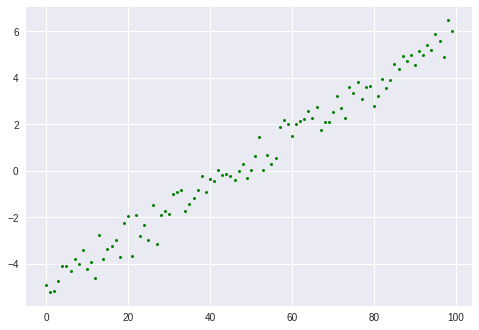

In [6]:
y = f(X) + np.random.normal(0, 0.5, m)
_ = plt.plot(y, 'go', markersize=3)

# Method

We approximate this point cloud with a linear function $h(x) = \theta^Tx, \quad \theta \in \mathbb{R}^n $

In [0]:
th = np.array([0, 0, 0, 0])

h = lambda x: np.dot(x, th)

We set our loss function:



> $L(\theta) = \frac {1}{2m}\sum_{0}^{m}(h(x^{(i)}) - y^{(i)})^2 = \frac {1}{2m}\sum_{0}^{m}(\theta^Tx^{(i)} - y^{(i)})^2 $

In [0]:
getLoss = lambda : sum( (h(X) - y) * (h(X) - y) ) / (2 * m)

**Normal equation gives**

> $\theta = (X^TX + \lambda R)^{-1}X^Ty \quad \text{where } R = I_n - E_{(0, 0)} $

In [0]:
regularization = 0.01
R = np.eye(n)
R[0, 0] = 0

th = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X) + regularization * R), X.T), y)

In [10]:
print("loss: {:.4f}".format(getLoss()))

loss: 0.1070


# Testing

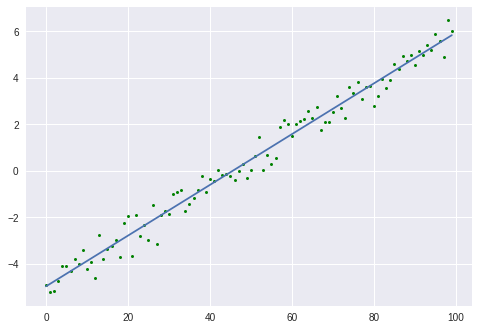

In [11]:
_ = plt.plot(y, 'go', markersize=3)
_ = plt.plot(h(X))